In [1]:
import pandas as pd

In [2]:
from pathlib import Path

In [3]:
TRAIN_PATH = r"C:\Users\David\OneDrive\Desktop\4th year subjects\Machine Learning\wildfires_training.csv"
TEST_PATH  = r"C:\Users\David\OneDrive\Desktop\4th year subjects\Machine Learning\wildfires_test.csv"

In [4]:
train_df = pd.read_csv(TRAIN_PATH)
test_df  = pd.read_csv(TEST_PATH)

In [5]:
from sklearn.preprocessing import OrdinalEncoder

In [6]:
on_fire = ['no', 'yes']

In [7]:
enc = OrdinalEncoder(categories=[on_fire])

In [8]:
train_df[['fire']] = enc.fit_transform(train_df[['fire']])

In [9]:
test_df[['fire']] = enc.transform(test_df[['fire']])

In [10]:
train_df.head(), test_df.head()

(   fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
 0   0.0  2015    28        59       0.0          8.06           3.47    1   
 1   0.0  2010    30        61       1.3          8.17           4.03    2   
 2   0.0  2009    26        83      13.1          8.08           3.59    3   
 3   0.0  2017    25        87       2.5          7.18           2.42    4   
 4   0.0  2014    28        77       0.0         14.98           4.63    5   
 
    month  wind_speed  
 0      6          19  
 1      6          13  
 2      6          22  
 3      6          15  
 4      6          18  ,
    fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
 0   0.0  2015    33        68       4.5          9.12           5.09   19   
 1   1.0  2009    28        56       0.0         38.17          21.21   12   
 2   0.0  2017    30        64       0.6         15.38           6.24   24   
 3   0.0  2007    23        74       8.3          7.36           2.27   1

In [11]:
X_train = train_df.drop(columns=['fire'])
Y_train = train_df['fire']

In [12]:
X_test  = test_df.drop(columns=['fire'])
y_test  = test_df['fire']

In [13]:
from sklearn.pipeline import Pipeline

In [14]:
from sklearn.svm import SVC

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [17]:
pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC(probability=True, random_state=42))])

In [23]:
param_grid = {'svc__kernel' : ['linear', 'rbf'], 'svc__C': [0.01, 0.1, 1, 10, 100],'svc__gamma': ['scale', 'auto', 0.01, 0.1, 1.0]}

In [24]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [25]:
grid = GridSearchCV( pipe,param_grid,scoring={'f1': 'f1', 'roc_auc': 'roc_auc', 'accuracy': 'accuracy'},refit='f1',cv=cv,n_jobs=-1,verbose=0)

In [26]:
grid.fit(X_train, Y_train)
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc',
                                        SVC(probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': ['scale', 'auto', 0.01, 0.1, 1.0],
                         'svc__kernel': ['linear', 'rbf']},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1', 'roc_auc': 'roc_auc'})

In [27]:
best_model = grid.best_estimator_
print("Best params:", grid.best_params_)
print("CV best F1:", round(grid.best_score_, 4))

Best params: {'svc__C': 100, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
CV best F1: 0.865


In [28]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix

In [29]:
y_pred_test  = best_model.predict(X_test)
y_proba_test = best_model.predict_proba(X_test)[:, 1]

In [31]:
acc  = accuracy_score(y_test, y_pred_test)

In [32]:
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred_test, average='binary', zero_division=0)

In [33]:
auc  = roc_auc_score(y_test, y_proba_test)

In [37]:
print({"Accuracy": round(acc, 4),"Precision": round(prec, 4),"Recall": round(rec, 4),"F1": round(f1, 4),"ROC_AUC": float(round(auc, 4))})

{'Accuracy': 0.9, 'Precision': 0.9259, 'Recall': 0.8929, 'F1': 0.9091, 'ROC_AUC': 0.9489}


In [45]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_test))

Confusion matrix:
 [[20  2]
 [ 3 25]]


In [46]:
import matplotlib.pyplot as plt

In [47]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

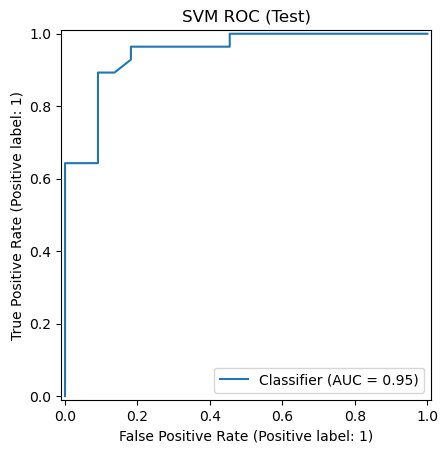

In [48]:
RocCurveDisplay.from_predictions(y_test, y_proba_test)
plt.title("SVM ROC (Test)"); plt.show()

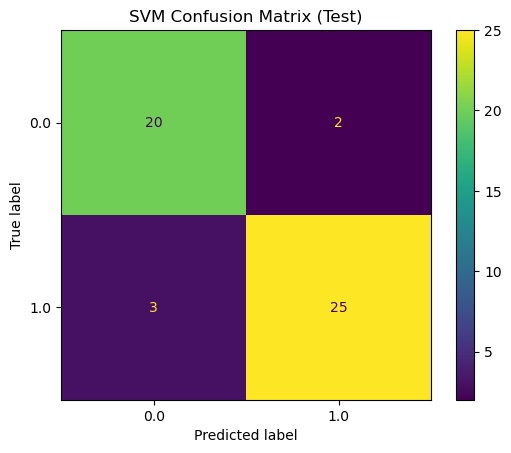

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.title("SVM Confusion Matrix (Test)"); plt.show()